In [23]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from AB_testing import *
plt.style.use('seaborn-darkgrid')

# Initializing two advertisement objects (A and B)

In [2]:
# Parameters for our beta distribution prior
alpha = 4
beta = 100
conversion_rate_value = 10

A = Advertisement(alpha, beta, conversion_rate_value)
B = Advertisement(alpha, beta, conversion_rate_value)

## Plotting our weakly informative prior
The distribution looks purple because it is a red distribution overlapping with a blue one.

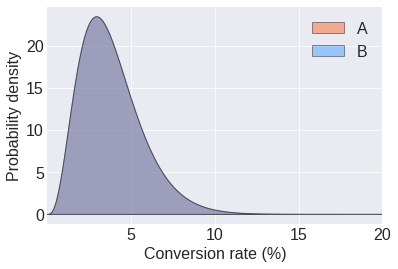

In [3]:
A.plot_conversion_dist('orangered')
B.plot_conversion_dist('dodgerblue')
plt.legend(['A', 'B'])

# Simulating an A/B test

In [4]:
# setting the seed to make the result repeatable
np.random.seed(0)
updated_value = simulate_test(A, B, test_sample_size=1000, verbose=True, update_objects=True)

Advertisement A: 76 conversions out of 1000
Advertisement B: 63 conversions out of 1000
A appears to be the better option


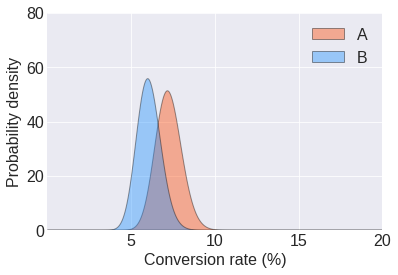

In [5]:
A.plot_conversion_dist('orangered')
B.plot_conversion_dist('dodgerblue')
plt.ylim(0,80)
plt.legend(['A', 'B'])

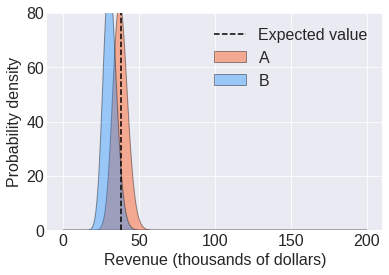

In [106]:
plt.axvline(updated_value, linestyle='--', color='k')
A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.ylim(0,80)
plt.legend(['Expected value', 'A', 'B'])

## Reset objects and simulate another test

In [7]:
np.random.seed(46)
A = Advertisement(alpha, beta, conversion_rate_value)
B = Advertisement(alpha, beta, conversion_rate_value)
updated_value = simulate_test(A, B, test_sample_size=1000, verbose=True, update_objects=True)

Advertisement A: 39 conversions out of 1000
Advertisement B: 33 conversions out of 1000
A appears to be the better option


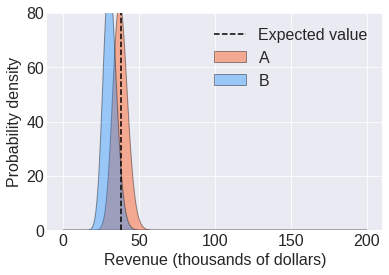

In [98]:
plt.axvline(updated_value, linestyle='--', color='k')
A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.ylim(0,80)
plt.legend(['Expected value', 'A', 'B'])

# Compute value of information starting from the weakly informed prior

In [9]:
np.random.seed(0)
A = Advertisement(alpha, beta, conversion_rate_value)
B = Advertisement(alpha, beta, conversion_rate_value)
voi = calc_voi(A, B, test_sample_size=1000)

100%|██████████| 5000/5000 [00:04<00:00, 1059.20it/s]


# Value of information as a function of sample size

In [16]:
np.random.seed(46)
A = Advertisement(alpha, beta, conversion_rate_value)
B = Advertisement(alpha, beta, conversion_rate_value)
updated_value = simulate_test(A, B, test_sample_size=1000, verbose=True, update_objects=True)

Advertisement A: 39 conversions out of 1000
Advertisement B: 33 conversions out of 1000
A appears to be the better option


In [63]:
voi_list = []
sample_sizes = np.arange(0,12000,300)
for size in sample_sizes:
    voi_list.append(calc_voi(A, B, test_sample_size=size))

100%|██████████| 5000/5000 [00:04<00:00, 1065.35it/s]


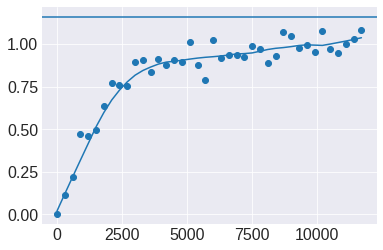

In [64]:
plt.scatter(sample_sizes, voi_list)
voc = calc_voc(A, B)
smooth_y = lowess(voi_list, sample_sizes, return_sorted=False, frac=0.3)
plt.axhline(voc)
plt.plot(sample_sizes, smooth_y)

In [33]:
smooth_y

array([-221.54918158,  658.96109879, 1151.67163153, 2052.81186162,
       3047.34668503, 2165.51397122, 2674.46041923, 3528.24722113,
       3856.23148784, 5460.78967798, 6176.26642578, 6701.16998349,
       5855.53630181, 6720.59018752, 6110.23801137, 7684.37013449,
       6243.68276001, 5976.4034525 , 6918.36417224, 6473.54789189])

In [72]:
calc_voc(A, B)

1.217850301358505

# Value of information as a function of sample size

In [100]:
np.random.seed(46)
A = Advertisement(alpha, beta, conversion_rate_value)
B = Advertisement(alpha, beta, conversion_rate_value)
updated_value = simulate_test(A, B, test_sample_size=1000, verbose=True, update_objects=True)
updated_value = simulate_test(A, B, test_sample_size=500, verbose=True, update_objects=True)

Advertisement A: 39 conversions out of 1000
Advertisement B: 33 conversions out of 1000
A appears to be the better option
Advertisement A: 18 conversions out of 500
Advertisement B: 13 conversions out of 500
A appears to be the better option


In [104]:
voi_list = []
sample_sizes = np.arange(0,12000,300)
for size in sample_sizes:
    voi_list.append(calc_voi(A, B, test_sample_size=size))

100%|██████████| 5000/5000 [00:04<00:00, 1015.99it/s]


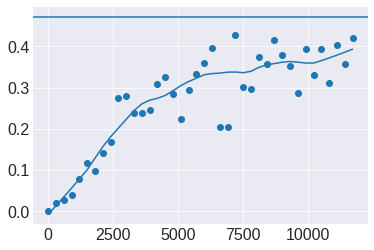

In [105]:
plt.scatter(sample_sizes, voi_list)
voc = calc_voc(A, B)
smooth_y = lowess(voi_list, sample_sizes, return_sorted=False, frac=0.3)
plt.axhline(voc)
plt.plot(sample_sizes, smooth_y)

In [103]:
smooth_y

array([-0.00475193,  0.02044421,  0.04590878,  0.07153688,  0.09730922,
        0.12362723,  0.15086414,  0.17736548,  0.20248952,  0.22222307,
        0.23567437,  0.24311035,  0.24922353,  0.25581084,  0.26330768,
        0.269847  ,  0.2740233 ,  0.2801046 ,  0.28829319,  0.29535636,
        0.30240858,  0.30980725,  0.31846135,  0.32625402,  0.33156979,
        0.33292002,  0.33116552,  0.32900593,  0.32637274,  0.32147632,
        0.31880952,  0.32110017,  0.32778465,  0.33693225,  0.34844382,
        0.36711168,  0.38661021,  0.40645229,  0.42708166,  0.44909381])

In [99]:
calc_voc(A, B)

0.472083020649535